## Step 1: Explanatory Data Analysis and Feature Engineering

### Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

: 

### Load The Dataset

In [3]:
complaints_df = pd.read_csv("consumer_complaints.csv")

### Explore The Dataset

In [4]:
complaints_df.head(10)  # Check the first few rows

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-09-04,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Trouble accessing funds in your mobile or digi...,NaN,NaN,NaN,"Paypal Holdings, Inc",NC,27587,NaN,NaN,Web,2023-09-04,Closed with explanation,Yes,NaN,7493283
1,2023-09-06,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,Company believes the complaint is the result o...,"CCS Financial Services, Inc.",FL,33032,NaN,NaN,Web,2023-09-06,Closed with explanation,Yes,NaN,7510657
2,2023-09-06,Checking or savings account,Other banking product or service,Managing an account,Problem accessing account,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,LA,70117,NaN,NaN,Web,2023-09-06,Closed with non-monetary relief,Yes,NaN,7510356
3,2023-09-07,Debt collection,Credit card debt,Communication tactics,Frequent or repeated calls,NaN,NaN,PORTFOLIO RECOVERY ASSOCIATES INC,PA,150XX,NaN,NaN,Web,2023-09-07,Closed with non-monetary relief,Yes,NaN,7514982
4,2023-09-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,"EQUIFAX, INC.",FL,33805,NaN,NaN,Web,2023-09-13,In progress,Yes,NaN,7537220
5,2023-09-13,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NH,03054,NaN,NaN,Web,2023-09-13,In progress,Yes,NaN,7537073
6,2023-09-11,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,95662,NaN,NaN,Web,2023-09-11,Closed with explanation,Yes,NaN,7529385
7,2023-09-11,Mortgage,VA mortgage,Trouble during payment process,"Escrow, taxes, or insurance",NaN,NaN,"NATIONS DIRECT MORTGAGE, LLC",IL,60103,Servicemember,NaN,Web,2023-09-11,In progress,Yes,NaN,7531974
8,2023-09-11,Debt collection,Medical debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,Procollect Services LLC,ND,58701,NaN,NaN,Web,2023-09-11,Closed with explanation,Yes,NaN,7531501
9,2023-09-12,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,CA,92311,NaN,NaN,Web,2023-09-12,In progress,Yes,NaN,7535727


In [5]:
print(complaints_df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065103 entries, 0 to 4065102
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 558.

### Creating a dictionary to map existing categories to the desired categories

In [6]:
category_mapping = {
    "Credit reporting, credit repair services, or other personal consumer reports": "Credit reporting, repair, or other",
    "Credit reporting or other personal consumer reports": "Credit reporting, repair, or other",
    "Credit card or prepaid card": "Consumer Loan",
    "Vehicle loan or lease": "Consumer Loan",
    "Checking or savings account": "Consumer Loan",
    "Money transfer, virtual currency, or money service": "Consumer Loan",
    "Payday loan, title loan, or personal loan": "Consumer Loan",
    "Credit card": "Consumer Loan",
    "Student loan": "Consumer Loan",
    "Payday loan, title loan, personal loan, or advance loan": "Consumer Loan",
    "Debt collection": "Debt collection",
    "Mortgage": "Mortgage"
}

In [7]:
# Apply the category mapping directly to the 'Product' column
complaints_df['Product'] = complaints_df['Product'].map(category_mapping)

In [8]:
print(complaints_df['Product'].value_counts())  # Check the distribution of target classes

Product
Credit reporting, repair, or other    2209961
Consumer Loan                          691959
Debt collection                        505290
Mortgage                               383776
Name: count, dtype: int64


In [9]:
# How many unique financial products (the second column) are we talking about here
complaints_df['Product'].nunique()

4

In [10]:
# The shape of the full, unmodified data
print('Shape of data',complaints_df.shape)

Shape of data (4065103, 18)


In [11]:
# The idea is to demonstrate a workflow, so we will work with a smaller portion of the data

# First, we retain only the columns relevant to our present purpose

df=complaints_df[['Consumer complaint narrative','Product']]
print('Shape of data',df.shape)

Shape of data (4065103, 2)


In [12]:
# Handling Missing Values
print('Before dropping the nulls')
display('Null count', df.isna().sum())
print('Total rows of data', len(df))
df.dropna(inplace=True)
print('='*80)
print('After dropping the nulls')
display('Null count', df.isna().sum())
print('Total rows of data', len(df))

Before dropping the nulls


'Null count'

Consumer complaint narrative    2592900
Product                          274117
dtype: int64

Total rows of data 4065103
After dropping the nulls


C:\Users\hp\AppData\Local\Temp\ipykernel_17200\2864751331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


'Null count'

Consumer complaint narrative    0
Product                         0
dtype: int64

Total rows of data 1411260


In [13]:
# Subset Selection
df = df.head(1000).reset_index(drop=True)
display(df.head())
display(df.tail())

,Consumer complaint narrative,Product
0,On XX/XX/ I made a written request to have PMI...,Mortgage
1,This complaint relates to Select Portfolio Ser...,Mortgage
2,A couple years ago I became aware of identity ...,"Credit reporting, repair, or other"
3,In accordance with the Fair Credit Reporting a...,"Credit reporting, repair, or other"
4,Lexington law is what happened.\n\nThey dooped...,"Credit reporting, repair, or other"


,Consumer complaint narrative,Product
995,This is my another request that I have been a ...,"Credit reporting, repair, or other"
996,You are in Direct Violation of The Fair Credit...,"Credit reporting, repair, or other"
997,"Seriously, it's been months since I investigat...","Credit reporting, repair, or other"
998,I sent letters and spoke over the phone with a...,"Credit reporting, repair, or other"
999,"When I reviewed my credit report, I discovered...","Credit reporting, repair, or other"


In [14]:
print('Shape of data',df.shape)

Shape of data (1000, 2)


In [15]:
# Kinds of products on which complaints are generated
df['Product'].nunique()

4

In [16]:
# Typical Complaint
df['Consumer complaint narrative'][0]

'On XX/XX/ I made a written request to have PMI removed from my mortgage as required by the Homeowners Protection Act. On XX/XX/XXXX  I called Truist to check on the status of my request since there had been no update on my request. The customer service representative I spoke to told me a letter had been sent on XX/XX/XXXX  ( attached ). I did not receive this letter until XX/XX/XXXX. The representative read the letter and informed me that my request had been denied because my home was a second home and my loan to value ratio ( LTV ) needed to be less than what my current LTV was. She would or could not elaborate on why my home was considered a second home, which it is not. This caused a panicked response by me and I immediately called XXXX XXXX  and my homeowners insurance to figure out why this was being reported as a second home. Nobody I spoke to at XXXX XXXX or my insurance agency could see that this was a second home. I then called Truist again for more information. I was told by

### Categories of products - the classes for which we will predict

In [17]:
list(df.Product.unique())

['Mortgage',
 'Credit reporting, repair, or other',
 'Debt collection',
 'Consumer Loan']

In [18]:
df['Product'].value_counts()

Product
Credit reporting, repair, or other    605
Consumer Loan                         237
Debt collection                        95
Mortgage                               63
Name: count, dtype: int64

## Step 2: Text Pre-Processing

In [44]:
# Clean text (remove punctuation and convert to lowercase)
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x).lower())

In [45]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # You can adjust max_features

In [46]:

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['Consumer complaint narrative'])

In [47]:

# Standardize the TF-IDF matrix (optional, but can improve some models)
scaler = StandardScaler(with_mean=False)
X_tfidf = scaler.fit_transform(X_tfidf)

## Step 3: Selection of Multi Classification Model

### In this step, I have choosen a multi-class classification model, Logistic Regression to train on our pre-processed text data.

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Consumer complaint narrative'], df['Product'], test_size=0.2, random_state=42
)

In [29]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [30]:
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)


In [31]:
# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [32]:
# Initialize and train a Logistic Regression model with an alternative solver (sag) and increased max_iter
model = LogisticRegression(solver='sag', max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, solver='sag')

In [33]:
# Make predictions on the test data
y_pred = model.predict(X_test_tfidf)

## Step 4: Comparison of Model Performance

###  In this step, we will evaluate the performance of our text classification model using various metrics.

In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.845


#An accuracy of 0.845 means that the text classification model correctly predicted the category for approximately 84.5% of the test data samples. In other words, out of all the test samples, about 84.5% of them were classified into the correct categories by your model.

In [35]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
                                     precision    recall  f1-score   support

                     Consumer Loan       0.75      0.82      0.79        56
Credit reporting, repair, or other       0.88      0.96      0.91       117
                   Debt collection       1.00      0.50      0.67        10
                          Mortgage       1.00      0.35      0.52        17

                          accuracy                           0.84       200
                         macro avg       0.91      0.66      0.72       200
                      weighted avg       0.86      0.84      0.83       200



## Step 5: Model Evaluation

In [42]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 46  10   0   0]
 [  5 112   0   0]
 [  3   2   5   0]
 [  7   4   0   6]]


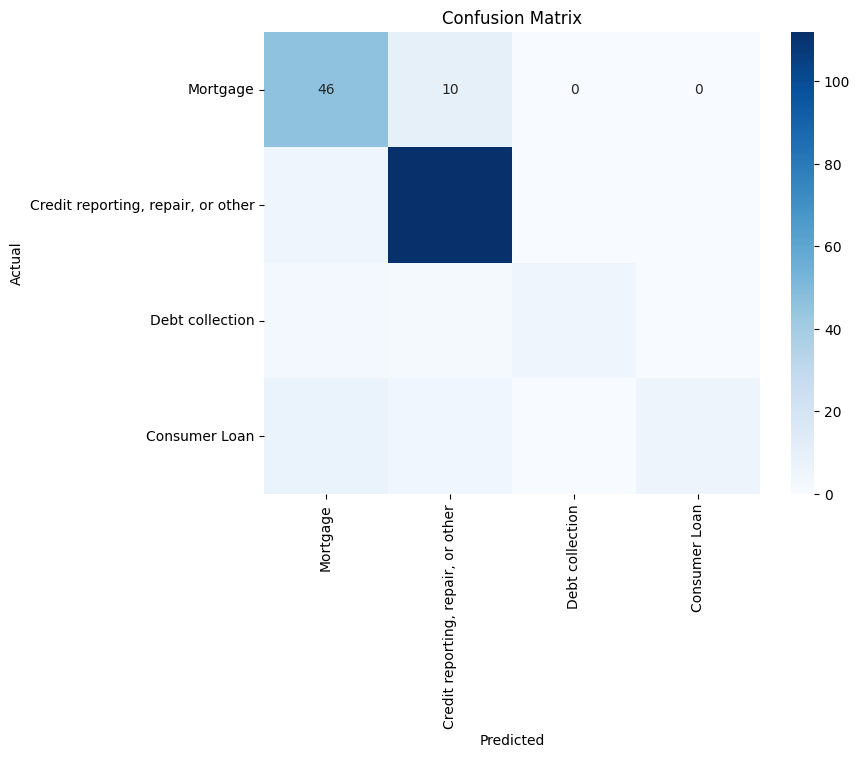

In [41]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Product'].unique(), yticklabels=df['Product'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Step 6: Prediction

### This step involves making predictions on new consumer complaints using the trained model.

In [48]:
# Example new complaint #1
new_complaint = "I have issues with my mortgage payment. It's not being processed correctly."

In [50]:
# Pre-process the new complaint
new_complaint = re.sub(r'[^a-zA-Z]', ' ', new_complaint).lower()
new_complaint_tfidf = tfidf_vectorizer.transform([new_complaint])

In [52]:
# Make a prediction
predicted_category = model.predict(new_complaint_tfidf)
print("Predicted Category:", predicted_category[0])

Predicted Category: Credit reporting, repair, or other


In [72]:
# Example new complaint #2
new_complaint_2 = "I'm receiving constant calls from a debt collector, and it's harassment."

# Pre-process the new complaint
new_complaint_2 = re.sub(r'[^a-zA-Z]', ' ', new_complaint_2).lower()
new_complaint_tfidf_2 = tfidf_vectorizer.transform([new_complaint_2])

# Make a prediction
predicted_category_2 = model.predict(new_complaint_tfidf_2)
print("Predicted Category:", predicted_category_2[0])


Predicted Category: Debt collection


In [73]:
# Example new complaint #3
new_complaint_3 = "I applied for a credit card, but my application was rejected without any explanation."

# Pre-process the new complaint
new_complaint_3 = re.sub(r'[^a-zA-Z]', ' ', new_complaint_3).lower()
new_complaint_tfidf_3 = tfidf_vectorizer.transform([new_complaint_3])

# Make a prediction
predicted_category_3 = model.predict(new_complaint_tfidf_3)
print("Predicted Category:", predicted_category_3[0])


Predicted Category: Credit reporting, repair, or other


In [74]:
# Example new complaint #4
new_complaint_4 = "I took out a personal loan, and the interest rate is much higher than what was initially promised."

# Pre-process the new complaint
new_complaint_4 = re.sub(r'[^a-zA-Z]', ' ', new_complaint_4).lower()
new_complaint_tfidf_4 = tfidf_vectorizer.transform([new_complaint_4])

# Make a prediction
predicted_category_4 = model.predict(new_complaint_tfidf_4)
print("Predicted Category:", predicted_category_4[0])


Predicted Category: Consumer Loan


In [76]:
# Example new complaint #5
new_complaint_5 = "I've been facing delays in my mortgage approval process, and the communication from the lender is inadequate."

# Pre-process the new complaint
new_complaint_5 = re.sub(r'[^a-zA-Z]', ' ', new_complaint_5).lower()
new_complaint_tfidf_5 = tfidf_vectorizer.transform([new_complaint_5])

# Make a prediction
predicted_category_5 = model.predict(new_complaint_tfidf_5)
print("Predicted Category:", predicted_category_5[0])


Predicted Category: Credit reporting, repair, or other


### Note on Model Limitation: Predicting Mortgage-Related Complaints


Our text classification model effectively categorizes various consumer complaints, but it may have limitations when predicting mortgage-related issues. Mortgage complaints often involve intricate details that may not be fully captured by the model. While it performs well across other categories, we acknowledge potential challenges in accurately predicting mortgage-related complaints due to their complexity.

We appreciate your understanding and remain committed to improving our model's performance in this area.